## Sales Store Prediction

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df=pd.read_csv('store_prediction_sales.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(14204, 12)

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### Checking missing values

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [7]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [8]:
df["Item_Weight"]=df['Item_Weight'].fillna(df["Item_Weight"].mean())

In [9]:
## Filling the missing values in Outlet_Size with mode
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
## Filling the missing values in Item_Outlet_Sales with mean
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean())

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Check Duplicates

In [11]:
df.duplicated().sum()

0

#### Check Data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [13]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [14]:
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 1.2+ MB


#### Droping unneccessory columns from dataframe

<Axes: >

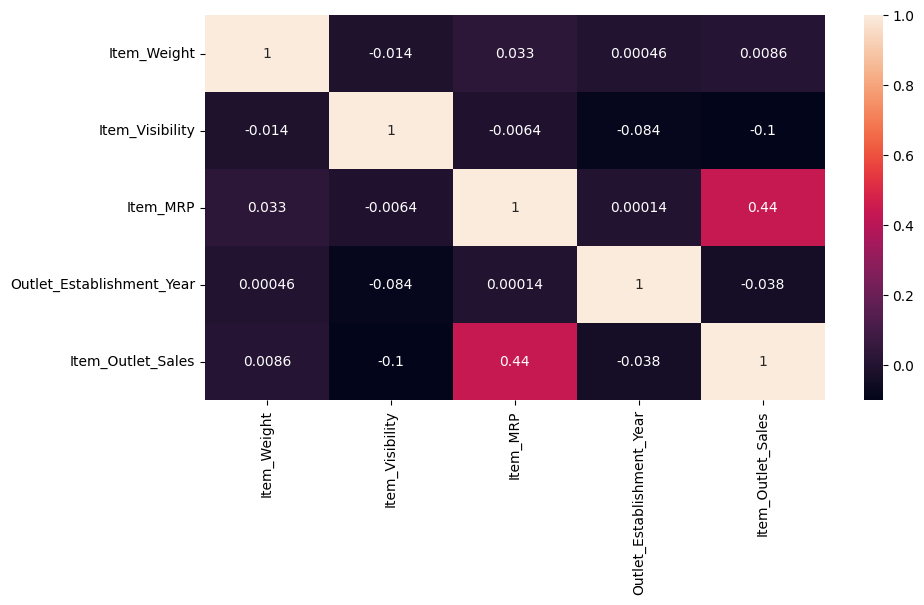

In [16]:
## make corr graph
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)

from above heatmap we come to conclusion we will drop the Item_Identifier,Item_weight, Item_Visibility & Outlet_Establishment_Year

In [17]:
df.drop(["Item_Identifier","Item_Visibility","Outlet_Establishment_Year","Item_Weight"],axis=1,inplace=True)

In [18]:
df.head(1)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735


### Checking the number of unique values of each column

In [19]:
df.nunique()

Item_Fat_Content           5
Item_Type                 16
Item_MRP                8052
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3120
dtype: int64

In [20]:
df.head(1)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735


### Correcting data

In [21]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [22]:
df["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64

In [23]:
# In this we will apply OneHotEncoder
df["Item_Fat_Content"].value_counts() 


Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [24]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})
df["Item_Fat_Content"].value_counts() 

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [25]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [26]:
df["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

In [27]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    8671
Small     3980
High      1553
Name: count, dtype: int64

In [28]:
print("Categories in 'Outlet_Size' variable:     ",end=" " )
print(df['Outlet_Size'].unique())

print("Categories in 'Outlet_Identifier' variable:  ",end=" ")
print(df['Outlet_Identifier'].unique())

print("Categories in 'Item_Type' variable:",end=" " )
print(df['Item_Type'].unique())

print("Categories in 'Item_Fat_Content' variable:     ",end=" " )
print(df['Item_Fat_Content'].unique())

print("Categories in 'Outlet_Location_Type' variable:     ",end=" " )
print(df['Outlet_Location_Type'].unique())

print("Categories in 'Outlet_Type' variable:     ",end=" " )
print(df['Outlet_Type'].unique())

Categories in 'Outlet_Size' variable:      ['Medium' 'High' 'Small']
Categories in 'Outlet_Identifier' variable:   ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Categories in 'Item_Type' variable: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Categories in 'Item_Fat_Content' variable:      ['Low Fat' 'Regular']
Categories in 'Outlet_Location_Type' variable:      ['Tier 1' 'Tier 3' 'Tier 2']
Categories in 'Outlet_Type' variable:      ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


#### define numerical & categorical columns

In [29]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Item_MRP', 'Item_Outlet_Sales']

We have 6 categorical features : ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [30]:
df.to_csv('store_prediction_sales_cleaned.csv',index=False)

#### Preparing X and Y variables

In [31]:
df.head(1)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735


In [32]:
X=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]

In [33]:
X

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
14199,Regular,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1
14200,Regular,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2
14201,Low Fat,Health and Hygiene,118.7440,OUT045,Medium,Tier 2,Supermarket Type1
14202,Regular,Canned,214.6218,OUT017,Medium,Tier 2,Supermarket Type1


In [34]:
y

0        3735
1         443
2        2097
3         732
4         994
         ... 
14199    2181
14200    2181
14201    2181
14202    2181
14203    2181
Name: Item_Outlet_Sales, Length: 14204, dtype: int32

### Create Column Transformer pipeline

In [35]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns
print(num_features)
print(cat_features)

Index(['Item_MRP'], dtype='object')
Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [36]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric_transformer = StandardScaler()  # StandardScaler is used to scale the numerical variables
oh_transformer=OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # OneHotEncoder is used to encode the categorical variables

preprocessor=ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ],
    remainder='passthrough'
)

In [37]:
X=preprocessor.fit_transform(X)

In [38]:
X.shape

(14204, 39)

In [39]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.752511
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.493696
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.009874
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.661838
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.403623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.005000
14200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.453249
14201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.358558
14202,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.185747


## Train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_train.shape, X_test.shape

((8522, 39), (5682, 39))

In [41]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.47385189],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.4538066 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.37246866],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.55197563],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.37140161],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.72906753]])

#### Create an Evaluate Function to give all metrics after model Training

In [42]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [61]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1067.1682
- Mean Absolute Error: 795.0351
- R2 Score: 0.3451
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1087.2134
- Mean Absolute Error: 811.7570
- R2 Score: 0.3281


Lasso
Model performance for Training set
- Root Mean Squared Error: 1067.3642
- Mean Absolute Error: 795.2755
- R2 Score: 0.3449
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1086.4687
- Mean Absolute Error: 811.0410
- R2 Score: 0.3291


Ridge
Model performance for Training set
- Root Mean Squared Error: 1067.1683
- Mean Absolute Error: 795.0267
- R2 Score: 0.3451
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1087.2102
- Mean Absolute Error: 811.7438
- R2 Score: 0.3281


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 937.5684
- Mean Absolute Error: 692.1697
- R2 Sco

## Result

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,0.329053
2,Ridge,0.328136
0,Linear Regression,0.328133
7,CatBoosting Regressor,0.298835
6,XGBRegressor,0.243079
5,Random Forest Regressor,0.229273
3,K-Neighbors Regressor,0.203083
8,AdaBoost Regressor,0.195090
4,Decision Tree,-0.312979


## Hyperparameter Tuning

In [53]:
# Initialize hyperparameter grids for different regression models



rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}



xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth": [3, 5, 7, 10],
    "n_estimators": [100, 200, 500, 1000],
    "colsample_bytree": [0.3, 0.7, 1.0],
    "subsample": [0.5, 0.75, 1.0]
}





elastic_params = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
}





In [59]:
randomcv_models = [
    
    ("RF", RandomForestRegressor(), rf_params),
   
   
    
    
    
]

In [60]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=50,
                                cv=3,
                                verbose=1,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 8, 'max_features': 7, 'max_depth': 10}


In [64]:
rf=RandomForestRegressor(n_estimators=1000, min_samples_split= 8, max_features= 7, max_depth= 10)

In [65]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=7, min_samples_split=8,
                      n_estimators=1000)

In [67]:
y_train_predict=rf.predict(X_train)

In [69]:
print(r2_score(y_train,y_train_pred))

0.4366257951408593
